<a href="https://colab.research.google.com/github/jordanthemate/projeto_sensor_fieldPRO/blob/main/Projeto_FieldPRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de Calibração: Sensor de Chuva**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Leitura dos Dados

In [ ]:
# Dados do sensor
sensor_fieldpro = pd.read_csv('/content/drive/MyDrive/Sensor_FieldPRO.csv')

# Dados da estação convencional
estacao_fieldpro = pd.read_csv('/content/drive/MyDrive/Estacao_Convencional.csv')
display(sensor_data)
display(estacao_data)

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature
0,2020-09-30 23:00:00+00:00,38.0,31.366,9412,0,45123,30
1,2020-10-01 00:00:00+00:00,NaN,NaN,9412,0,45025,31
2,2020-10-01 01:00:00+00:00,39.0,31.366,9419,0,44923,31
3,2020-10-01 02:00:00+00:00,39.0,31.322,9419,0,44825,31
4,2020-10-01 03:00:00+00:00,38.0,31.240,9416,0,44728,31
...,...,...,...,...,...,...,...
1706,2020-12-11 09:00:00+00:00,82.0,19.480,9422,3,20669,17
1707,2020-12-11 10:00:00+00:00,69.0,24.000,9429,3,20606,19
1708,2020-12-11 11:00:00+00:00,63.0,25.440,9436,3,20529,25
1709,2020-12-11 12:00:00+00:00,60.0,27.160,9439,3,20442,28


,data,Hora (Brasília),chuva
0,2020-09-01,00:00:00,0.0
1,2020-09-01,01:00:00,0.0
2,2020-09-01,02:00:00,0.0
3,2020-09-01,03:00:00,0.0
4,2020-09-01,04:00:00,0.0
...,...,...,...
2251,2020-12-03,19:00:00,0.0
2252,2020-12-03,20:00:00,0.0
2253,2020-12-03,21:00:00,0.0
2254,2020-12-03,22:00:00,0.0


In [ ]:
# Amostras de dados
print("Amostras do dataset do sensor:")
print(sensor_fieldpro.head())

print("Amostras do dataset da estação convencional:")
print(estacao_fieldpro.head())

# Tipos de dados
print("Tipos de dados do dataset do sensor:")
print(sensor_fieldpro.dtypes)

print("Tipos de dados do dataset da estação convencional:")
print(estacao_fieldpro.dtypes)


Amostras do dataset do sensor:
         Datetime – utc  air_humidity_100  air_temperature_100  \
0  2020-09-30T23:00:00Z              38.0               31.366   
1  2020-10-01T00:00:00Z               NaN                  NaN   
2  2020-10-01T01:00:00Z              39.0               31.366   
3  2020-10-01T02:00:00Z              39.0               31.322   
4  2020-10-01T03:00:00Z              38.0               31.240   

   atm_pressure_main  num_of_resets  piezo_charge  piezo_temperature  
0               9412              0         45123                 30  
1               9412              0         45025                 31  
2               9419              0         44923                 31  
3               9419              0         44825                 31  
4               9416              0         44728                 31  
Amostras do dataset da estação convencional:
         data Hora (Brasília)  chuva
0  2020-09-01        00:00:00    0.0
1  2020-09-01        01:00:

In [ ]:
print(sensor_fieldpro.columns)
print(estacao_fieldpro.columns)

Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
       'atm_pressure_main', 'num_of_resets', 'piezo_charge',
       'piezo_temperature'],
      dtype='object')
Index(['data', 'Hora (Brasília)', 'chuva'], dtype='object')


#Pré-processamento dos Dados

In [ ]:
# Data e hora para o tipo datetime64
sensor_fieldpro['Datetime – utc'] = pd.to_datetime(sensor_fieldpro['Datetime – utc'])
estacao_fieldpro['data'] = pd.to_datetime(estacao_fieldpro['data'])
estacao_fieldpro['Hora (Brasília)'] = pd.to_datetime(estacao_fieldpro['Hora (Brasília)'])

In [ ]:
# Quantidade de valores ausentes em cada coluna no DataFrame 'sensor_fieldpro'
print(sensor_fieldpro.isnull().sum())

# Valores ausentes com a média dos dados em 'air_humidity_100'
mean_humidity = sensor_fieldpro['air_humidity_100'].mean()
sensor_fieldpro['air_humidity_100'].fillna(mean_humidity, inplace=True)

# Valores ausentes em 'piezo_charge' no DataFrame 'estacao_fieldpro'
estacao_fieldpro.dropna(subset=['chuva'], inplace=True)


Datetime – utc         0
air_humidity_100       6
air_temperature_100    6
atm_pressure_main      0
num_of_resets          0
piezo_charge           0
piezo_temperature      0
dtype: int64


In [ ]:
# Resolvi tratar os dados ausentes preenchendo com um valor constante 'air_temperature_100' com a média
mean_temperature = sensor_fieldpro['air_temperature_100'].mean()
sensor_fieldpro['air_temperature_100'].fillna(mean_temperature, inplace=True)

In [ ]:
# Normalização das colunas numéricas

from sklearn.preprocessing import MinMaxScaler

# Objeto do scaler
scaler = MinMaxScaler()

# Normalização das Colunas
columns_to_normalize = ['air_humidity_100', 'air_temperature_100', 'atm_pressure_main', 'num_of_resets', 'piezo_charge', 'piezo_temperature']
sensor_fieldpro[columns_to_normalize] = scaler.fit_transform(sensor_fieldpro[columns_to_normalize])



#Treinamento do Modelo

In [ ]:
# divisão dos conjuntos
from sklearn.model_selection import train_test_split

# Colunas de recursos (X) coluna de rótulos (y)
X = sensor_fieldpro.drop(columns=['Datetime – utc', 'air_temperature_100'])
y = sensor_fieldpro['air_temperature_100']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Regressão Linear

from sklearn.linear_model import LinearRegression

# Instanciando
model = LinearRegression()

# Treinando
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Previsões
y_pred = model.predict(X_test)

# métrica de erro (MSE)
mse = mean_squared_error(y_test, y_pred)

# coeficiente de determinação (R2)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.0021612811786517424
R-squared (R2): 0.9483135915152914


### Esse resultado indica que o modelo apresenta um baixo erro médio quadrático com o coeficiente de determinação (R2) de aproximadamente 94,83 de variabilidade da temperatura do ar.

# Vizualizando as Previsões

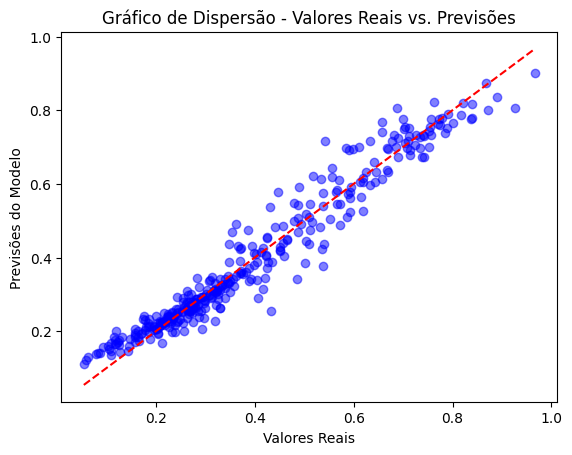

In [ ]:
# Gráfico de dispersão com linha de referência na diagonal
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões do Modelo')
plt.title('Gráfico de Dispersão - Valores Reais vs. Previsões')
plt.show()


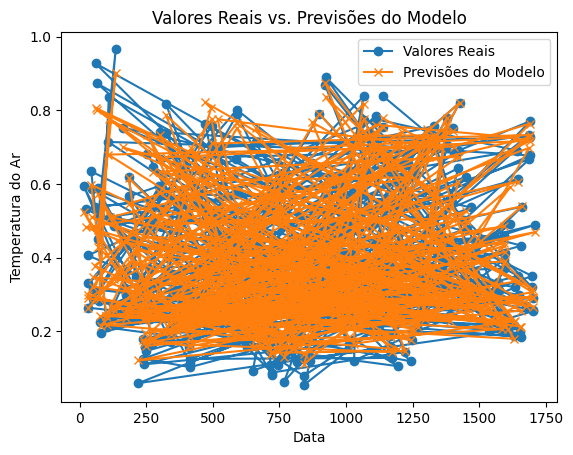

In [ ]:
# Gráfico de linha para comparar os valores reais e as previsões ao longo do tempo
plt.plot(y_test.index, y_test, label='Valores Reais', marker='o')
plt.plot(y_test.index, y_pred, label='Previsões do Modelo', marker='x')
plt.xlabel('Data')
plt.ylabel('Temperatura do Ar')
plt.title('Valores Reais vs. Previsões do Modelo')
plt.legend()
plt.show()


# Análise dos Resíduos

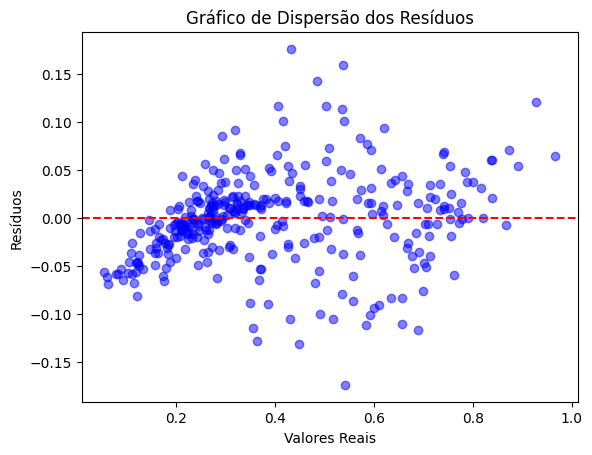

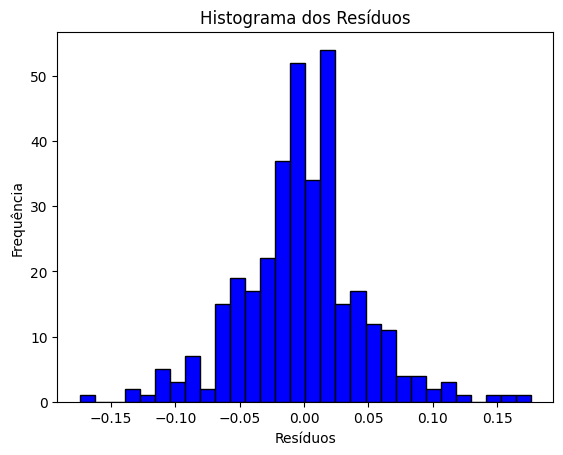

In [ ]:
# Calculando os residuos
residuals = y_test - y_pred

# Dispersão dos resíduos em relação aos valores reais
plt.scatter(y_test, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Reais')
plt.ylabel('Resíduos')
plt.title('Gráfico de Dispersão dos Resíduos')
plt.show()

# Histograma
plt.hist(residuals, bins=30, color='blue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()


### Esse resultado indica que o modelo apresenta um baixo erro médio quadrático com o coeficiente de determinação (R2) de aproximadamente 92,81 de variabilidade da temperatura do ar.

#Importância das Features


In [ ]:
tree_model.fit(X_train, y_train)

# Importância relativa das features
importances = tree_model.feature_importances_

# DataFrame para visualizar as importâncias
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# DataFrame pelas importâncias em ordem decrescente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print(feature_importance_df)


             Feature  Importance
4  piezo_temperature    0.947076
0   air_humidity_100    0.019154
1  atm_pressure_main    0.013114
3       piezo_charge    0.012111
2      num_of_resets    0.008546


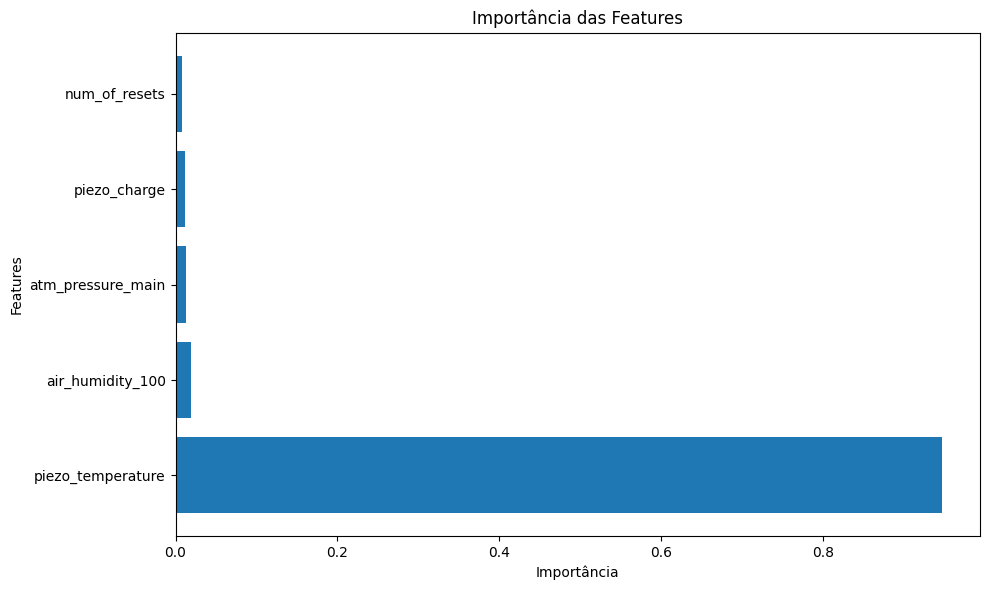

In [ ]:
import matplotlib.pyplot as plt

# Gráfico das importâncias
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features')
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Salvar o modelo treinado em um arquivo
joblib.dump(tree_model, 'model.joblib')


['model.joblib']